# Political Views

In [1]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from empiricaldist import Pmf

In [3]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/PoliticalAlignmentCaseStudy/' +
         'raw/update2021/gss_eds.3.hdf5')

In [4]:
datafile = 'gss_eds.3.hdf5'
gss = pd.read_hdf(datafile, 'gss0')
gss.shape

(68846, 204)

## Political alignment

The people surveyed as part of the GSS were asked about their "political alignment", which is where they place themselves on a spectrum from liberal to conservative.

The variable `polviews` contains responses to the following question (see <https://gssdataexplorer.norc.org/projects/52787/variables/178/vshow>):

> We hear a lot of talk these days about liberals and conservatives. 
I'm going to show you a seven-point scale on which the political views that people might hold are arranged from extremely liberal--point 1--to extremely conservative--point 7. Where would you place yourself on this scale?

Here are the valid responses:

```
1	Extremely liberal
2	Liberal
3	Slightly liberal
4	Moderate
5	Slightly conservative
6	Conservative
7	Extremely conservative
```

To see how the responses have changed over time, we'll inspect them at the beginning and end of the observation period.
First I'll select the column.

In [5]:
# Solution

polviews = gss['polviews']

In [6]:
# Solution

year74 = (gss['year'] == 1974)

In [7]:
# Solution

polviews74 = polviews[year74]

In [8]:
# Solution

polviews74.value_counts().sort_index()

1.0     31
2.0    201
3.0    211
4.0    538
5.0    223
6.0    181
7.0     30
Name: polviews, dtype: int64

In [9]:
def values(series):
    """Count the values and sort.
    
    series: pd.Series
    
    returns: series mapping from values to frequencies
    """
    return series.value_counts().sort_index()

In [10]:
# Solution

values(polviews74)

1.0     31
2.0    201
3.0    211
4.0    538
5.0    223
6.0    181
7.0     30
Name: polviews, dtype: int64

**Exercise:** Create a Boolean `Series` that is `True` when `year` is 2021, then use it to select corresponding values from `polviews`. Use `values` to display the selected values and how many times each one appears. 

In [11]:
# Solution

year21 = (gss['year'] == 2021)
polviews21 = polviews[year21]
values(polviews21)

1.0     212
2.0     577
3.0     427
4.0    1506
5.0     480
6.0     569
7.0     181
Name: polviews, dtype: int64

## PMFs

To visualize these distributions, we'll use a Probability Mass Function (PMF), which is similar to a histogram, but there are two differences:

* In a histogram, values are often put in bins, with more than one value in each bin. In a PMF each value gets its own bin.

* A histogram computes a count, that is, how many times each value appears; a PMF computes a probability, that is, what fraction of the time each value appears. 

I'll use the `Pmf` class from `empiricaldist` to compute a PMF.

In [12]:
# Solution

from empiricaldist import Pmf

pmf74 = Pmf.from_seq(polviews74)
pmf74

,probs
1.0,0.021908
2.0,0.142049
3.0,0.149117
4.0,0.380212
5.0,0.157597
6.0,0.127915
7.0,0.021201


In [13]:
def decorate(**options):
    """Decorate the current axes.
    
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
             
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    ax = plt.gca()
    ax.set(**options)
    
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels)

    plt.tight_layout()

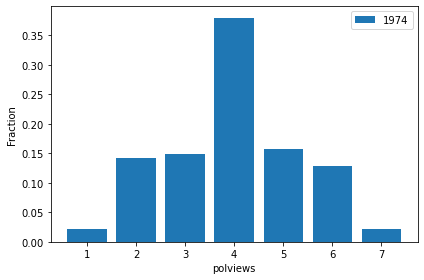

In [14]:
# Solution

pmf74.bar(label='1974')

decorate(xlabel='polviews',
         ylabel='Fraction')

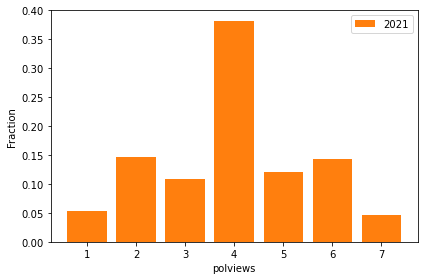

In [15]:
# Solution

pmf21 = Pmf.from_seq(polviews21)
pmf21.bar(label='2021', color='C1')

decorate(xlabel='polviews',
         ylabel='Fraction')

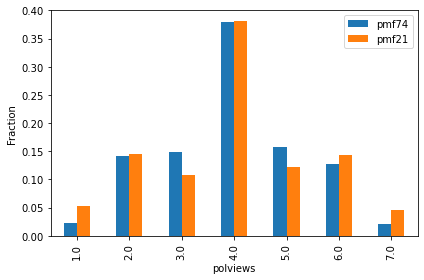

In [16]:
# Solution

d = {'pmf74': pmf74, 
     'pmf21': pmf21}

df = pd.DataFrame(d)
df.plot(kind='bar')

decorate(xlabel='polviews',
         ylabel='Fraction')

In [17]:
# Solution

polviews74.mean(), polviews74.std()

(3.978092, 1.3324163)

In [18]:
# Solution

polviews21.mean(), polviews21.std()

(3.98583, 1.5115522)

In [19]:
# Solution

# The mean has barely changed, which indicates no
# net shift toward liberalism or conservatism.

# The standard deviation has increased, 
# which suggests increasting polarization.

## Time Series



In [20]:
# Solution

gss_by_year = gss.groupby('year')
gss_by_year

In [21]:
# Solution

for year, group in gss_by_year:
    print(year, len(group))

1972 1613
1973 1504
1974 1484
1975 1490
1976 1499
1977 1530
1978 1532
1980 1468
1982 1860
1983 1599
1984 1473
1985 1534
1986 1470
1987 1819
1988 1481
1989 1537
1990 1372
1991 1517
1993 1606
1994 2992
1996 2904
1998 2832
2000 2817
2002 2765
2004 2812
2006 4510
2008 2023
2010 2044
2012 1974
2014 2538
2016 2867
2018 2348
2021 4032


In [22]:
# Solution

polviews_by_year = gss_by_year['polviews']
polviews_by_year

In [23]:
# Solution

mean_series = polviews_by_year.mean()
mean_series

year
1972         NaN
1973         NaN
1974    3.978092
1975    3.942775
1976    4.041637
1977    4.006780
1978    4.079890
1980    4.106040
1982    4.062929
1983    4.209845
1984    4.195913
1985    4.174506
1986    4.238532
1987    4.034849
1988    4.132725
1989    4.080857
1990    4.142966
1991    4.168027
1993    4.168468
1994    4.215177
1996    4.215384
1998    4.110283
2000    4.052374
2002    4.152381
2004    4.285177
2006    4.146252
2008    4.146556
2010    4.058734
2012    4.032996
2014    4.161343
2016    4.048586
2018    4.088574
2021    3.985830
Name: polviews, dtype: float32

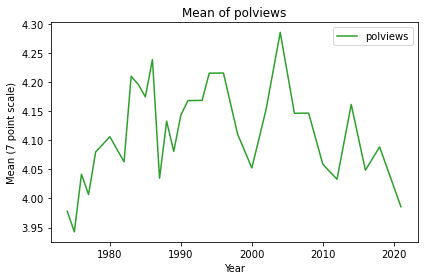

In [24]:
# Solution

mean_series.plot(color='C2', label='polviews')
decorate(xlabel='Year', 
         ylabel='Mean (7 point scale)',
         title='Mean of polviews')

**Exercise:** The standard deviation quantifies the spread of the distribution, which is one way to measure polarization.
Plot standard deviation of `polviews` for each year of the survey from 1972 to 2021.
Does it show evidence of increasing polarization?

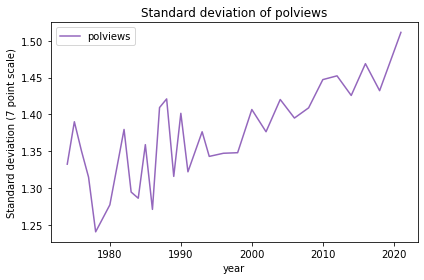

In [25]:
# Solution

std_series = gss_by_year['polviews'].std()
std_series.plot(color='C4', label='polviews')
decorate(ylabel='Standard deviation (7 point scale)',
         title='Standard deviation of polviews')

## Local Regression

In the previous section we plotted mean and standard deviation of `polviews` over time.  Both plots are quite noisy.
We can use **local regression** to compute a smooth line through these data points (see <https://en.wikipedia.org/wiki/Local_regression>).  

The following function takes a Pandas Series and uses an algorithm called LOWESS to compute a smooth line.  LOWESS stands for "locally weighted scatterplot smoothing".

In [26]:
from statsmodels.nonparametric.smoothers_lowess import lowess

def make_lowess(series):
    """Use LOWESS to compute a smooth line.
    
    series: pd.Series
    
    returns: pd.Series
    """
    # take the data out of the Series
    y = series.values
    x = series.index.values

    # compute the linear regression
    smooth = lowess(y, x)
    
    # put the result into a Series
    index, data = np.transpose(smooth)
    return pd.Series(data, index=index) 

In [27]:
def plot_series_lowess(series, color):
    """Plots a series of data points and a smooth line.
    
    series: pd.Series
    color: string or tuple
    """
    # plot the data with circles
    series.plot(linewidth=0, marker='o', color=color, alpha=0.5)
    
    # plot the local regression with a line
    smooth = make_lowess(series)
    smooth.plot(label='', color=color)

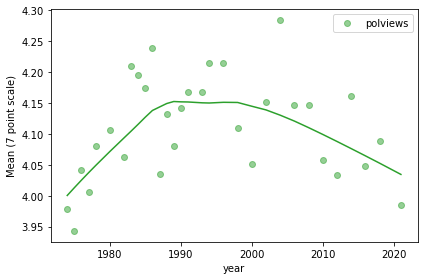

In [28]:
# Solution

mean_series = gss_by_year['polviews'].mean()
plot_series_lowess(mean_series, 'C2')

decorate(ylabel='Mean (7 point scale)')

**Exercise:** Use `plot_series_lowess` to plot the standard deviation of `polviews` with a smooth line.

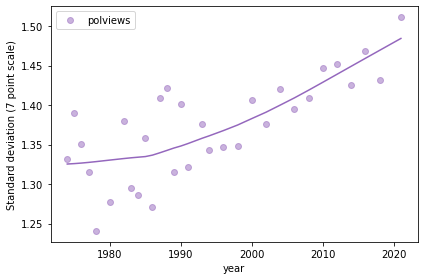

In [29]:
# Solution

std_series = gss_by_year['polviews'].std()
plot_series_lowess(std_series, color='C4')
decorate(ylabel='Standard deviation (7 point scale)')

## Cross Tabulation

In the previous sections, we treated `polviews` as a numerical quantity, so we were able to compute means and standard deviations.
But the responses are really categorical, which means that each value represents a discrete category, like "liberal" or "conservative".
In this section, we'll treat `polviews` as a categorical variable.  Specifically, we'll compute the number of respondents in each category for each year, and plot changes over time.

Pandas provides a function called `crosstab` that computes a **cross tabulation** (see <https://en.wikipedia.org/wiki/Contingency_table>).
It takes two `Series` objects as arguments and returns a `DataFrame`.

In [30]:
# Solution

year = gss['year']
column = gss['polviews']

xtab = pd.crosstab(year, column)
xtab.head()

polviews,1.0,2.0,3.0,4.0,5.0,6.0,7.0
year,,,,,,,
1974,31,201,211,538,223,181,30
1975,56,184,207,540,204,162,45
1976,31,198,175,564,209,206,34
1977,37,181,214,594,243,164,42
1978,21,140,255,559,265,187,25


In [31]:
# Solution

xtab_norm = pd.crosstab(year, column, normalize='index')
xtab_norm.head()

polviews,1.0,2.0,3.0,4.0,5.0,6.0,7.0
year,,,,,,,
1974,0.021908,0.142049,0.149117,0.380212,0.157597,0.127915,0.021201
1975,0.040057,0.131617,0.148069,0.386266,0.145923,0.115880,0.032189
1976,0.021877,0.139732,0.123500,0.398024,0.147495,0.145378,0.023994
1977,0.025085,0.122712,0.145085,0.402712,0.164746,0.111186,0.028475
1978,0.014463,0.096419,0.175620,0.384986,0.182507,0.128788,0.017218


## Colors

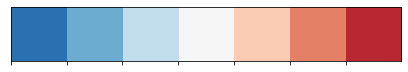

In [32]:
# Solution

palette = sns.color_palette('RdBu_r', 7)
sns.palplot(palette)

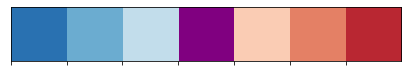

In [33]:
# Solution

palette[3] = 'purple'
sns.palplot(palette)

In [34]:
# Solution

color_map = dict(zip(xtab_norm.columns, palette))
color_map

{1.0: (0.16339869281045757, 0.44498269896193776, 0.6975009611687812),
 2.0: (0.4206843521722416, 0.6764321414840447, 0.8186851211072664),
 3.0: (0.7614763552479817, 0.8685121107266438, 0.924567474048443),
 4.0: 'purple',
 5.0: (0.9824682814302191, 0.8006920415224913, 0.7061130334486736),
 6.0: (0.8945790080738177, 0.5038062283737024, 0.39976931949250283),
 7.0: (0.7284890426758939, 0.15501730103806227, 0.1973856209150327)}

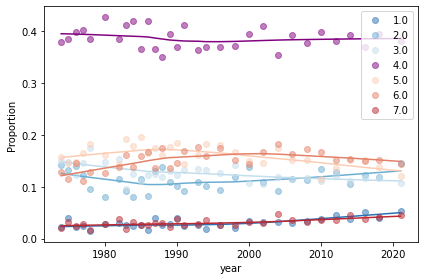

In [35]:
# Solution

for name, column in xtab_norm.iteritems():
    plot_series_lowess(column, color_map[name])
    
decorate(ylabel='Proportion')

# plt.legend(bbox_to_anchor=(1.02, 1.02));

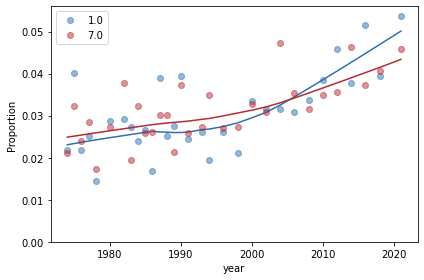

In [36]:
# Solution

for name, column in xtab_norm.iteritems():
    if name not in [1, 7]:
        continue
    plot_series_lowess(column, color_map[name])
    
    
decorate(ylabel='Proportion',
         ylim=[0, 0.056])

Political Alignment Case Study

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)